# Image classification
## Based on the first 2 lectures from fastdotai, we need to get hands on with the image classification tasks
### Using the datasets provided by the fast ai library

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Import the fastai required libraries

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
# for reading matlab data annotations
import scipy.io


Lets do 'CARS' from stanford. Image classificaiton task. Pretty straight forward.

EDIT: Takes forever to download. Need to leverage for more learning tasks.

In [3]:
path = untar_data(URLs.CARS); path

PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars')

In [4]:
 #check the directory structure
path.ls()

[PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_annos.mat'),
 PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_test'),
 PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/devkit'),
 PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/car_devkit.tgz'),
 PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_train')]

Lets check out these folders. Annotations is a matrix file. Need to read the content.

Exploring the files from command line ......

1. cars_annos.mat is a matlab file
2. test and train folders are both given

Q. How do we use the annotations?
Checking the fastai libraray

In [ ]:
doc(ImageDataBunch)

Nothing from fast ai library.

In [ ]:
file_name = path/'cars_annos.mat'
annotations = scipy.io.loadmat(file_name)

In [ ]:
# print(annotations)
# type(annotations)

# for keys,values in annotations.items():
#     print (keys)
#     if type(values) == list:
#         for value in values:
#             print('--',value)
#     else:
#         print(':', values)

# print(annotations['annotations'])
# print(type(annotations['annotations']))
# np.shape(annotations['annotations'])
# list(annotations['annotations'][0,1])


Data bunch creation start

Let us seperate the names and the classs types
Also, need to take care of the test and train images

In [ ]:
# each image entry
annotations['annotations'][0,0]


In [ ]:
# name of the car
annotations['annotations'][0,0][0]


In [ ]:
# np.lstrip(annotations['annotations'][0,0][0])
a = annotations['annotations'][0,0][0]
name = np.core.defchararray.split(a, sep='/', maxsplit=1)[0][1]

In [ ]:
# the above thing works
# # name = np.array2string(annotations['annotations'][0,0][0])
# name = annotations['annotations'][0,0][0].tostring()
# name1 = name.decode('utf-8').strip('\x00')
# print(name1)
# name1
# # name1 is my string

In [ ]:
print(name)
img_name = name
path_img = path/'cars_train'
f_name = path_img/img_name
print(f_name)

Fnames is not reading file names in order. Cant be used by us. Chuck it, lets construct our own file names.

In [ ]:
# fnames = get_image_files(path/'cars_train')
# print(fnames[:10])
# fnames +=get_image_files(path/'cars_test')
# print(fnames[-10:])

We know how to make the file names now. Lets run a loop and prepare the 2 lists.

IMP: We are dropping the focus area data.
TODO: Implement image transformationto take care of that

In [ ]:

count_train = 0 
count_test = 0

for img_data in annotations['annotations'][0,]:
    a = img_data[0]
#     print(a)
    name = np.core.defchararray.split(a, sep='/', maxsplit=1)[0][1]
    if img_data[6]:
        count_test +=1
    else:
        count_train +=1
        
#     print(name,img_data[6])
    print(img_data)
    print()

print(count_train,count_test)

# Important findings:

## The annotations are not in sync with the data set provided. Hence, there is no way to identify which image belongs to which class.

## For this we need to download another file and extract it to get the annotations

## A quick look into the dataset can be found here:
https://www.kaggle.com/eduardo4jesus/stanford-cars-dataset-a-quick-look-up


In [ ]:
help(untar_data)

In [ ]:
# devkit_url = 'https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz'
# path = untar_data(devkit_url,dest=path); path


The above did not work, unfortunately. Quick fix, download it directly to the terminal using the following commands:

cd ~/.fastai/data/stanford_cars

wget https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz

tar -xvzf car_devkit.tgz

In [5]:
path


PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars')

In [6]:
path.ls()

[PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_annos.mat'),
 PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_test'),
 PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/devkit'),
 PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/car_devkit.tgz'),
 PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_train')]

Check that you have got the devkit folder in the dataset. This contains the actual annotations that we are gonna use for our training

In [7]:
dev_path = path/'devkit'
dev_path.ls()

[PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/devkit/cars_test_annos.mat'),
 PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/devkit/train_perfect_preds.txt'),
 PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/devkit/eval_train.m'),
 PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/devkit/cars_train_annos.mat'),
 PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/devkit/cars_meta.mat'),
 PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/devkit/README.txt')]

The files mentioned in the kaggle post. Withour further ado, lets start loading them

In [8]:
train_annos_file = dev_path/'cars_train_annos.mat'
train_annos = scipy.io.loadmat(train_annos_file)
print(train_annos)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013', '__version__': '1.0', '__globals__': [], 'annotations': array([[(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
        (array([[36]], dtype=uint8), array([[116]], dtype=uint8), array([[868]], dtype=uint16), array([[587]], dtype=uint16), array([[3]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
        (array([[85]], dtype=uint8), array([[109]], dtype=uint8), array([[601]], dtype=uint16), array([[381]], dtype=uint16), array([[91]], dtype=uint8), array(['00003.jpg'], dtype='<U9')),
        (array([[621]], dtype=uint16), array([[393]], dtype=uint16), array([[1484]], dtype=uint16), array([[1096]], dtype=uint16), array([[134]], dtype=uint8), array(['00004.jpg'], dtype='<U9')),
        ...,
        (array([[138]], dtype=uint8), array([[150]], dtype=uint8), arr

In [9]:
train_annos['annotations'][0,1]

(array([[36]], dtype=uint8), array([[116]], dtype=uint8), array([[868]], dtype=uint16), array([[587]], dtype=uint16), array([[3]], dtype=uint8), array(['00002.jpg'], dtype='<U9'))

As mentioned in the readme, the first 4 parameters are image crop indexes.
5th is the image class
6th is the image name

In [10]:
a = train_annos['annotations'][0,1][5][0]
a
# train_annos['annotations'][0,1][4][0][0]


'00002.jpg'

We are going to use the *from_list* method for the imagedata parsing

In [11]:
train_fnames = []
train_classes = []

In [12]:
train_path = path/'cars_train'
train_path

PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_train')

In [13]:
for image_data in train_annos['annotations'][0,]:
#     print(image_data)
    img_name = image_data[5][0]
    img_path = train_path/img_name
    train_fnames.append(img_path)
    # may lord have mercy for the array indexing
    train_classes.append(image_data[4][0][0])
        
    

In [14]:
#sanity check
print(train_fnames[:10])
print(train_classes[:10])

[PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_train/00001.jpg'), PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_train/00002.jpg'), PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_train/00003.jpg'), PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_train/00004.jpg'), PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_train/00005.jpg'), PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_train/00006.jpg'), PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_train/00007.jpg'), PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_train/00008.jpg'), PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_train/00009.jpg'), PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_train/00010.jpg')]
[14, 3, 91, 134, 106, 123, 89, 96, 167, 58]


In [15]:
test_annos_file = dev_path/'cars_test_annos.mat'
test_annos = scipy.io.loadmat(test_annos_file)
print(test_annos)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Dec 14 14:13:07 2013', '__version__': '1.0', '__globals__': [], 'annotations': array([[(array([[30]], dtype=uint8), array([[52]], dtype=uint8), array([[246]], dtype=uint8), array([[147]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
        (array([[100]], dtype=uint8), array([[19]], dtype=uint8), array([[576]], dtype=uint16), array([[203]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
        (array([[51]], dtype=uint8), array([[105]], dtype=uint8), array([[968]], dtype=uint16), array([[659]], dtype=uint16), array(['00003.jpg'], dtype='<U9')),
        (array([[67]], dtype=uint8), array([[84]], dtype=uint8), array([[581]], dtype=uint16), array([[407]], dtype=uint16), array(['00004.jpg'], dtype='<U9')),
        ...,
        (array([[23]], dtype=uint8), array([[18]], dtype=uint8), array([[640]], dtype=uint16), array([[459]], dtype=uint16), array(['08038.jpg'], dtype='<U9')),
        (array([[33]], dtype=ui

In [16]:
test_annos['annotations'][0,1]

(array([[100]], dtype=uint8), array([[19]], dtype=uint8), array([[576]], dtype=uint16), array([[203]], dtype=uint8), array(['00002.jpg'], dtype='<U9'))

Test annos catch: Classes to be taken from the text file.
#### Leap of faith, assume that we they will be in sync

In [17]:
test_fnames = []
test_classes = []
test_path = path/'cars_test'
test_path

PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_test')

In [18]:
for image_data in test_annos['annotations'][0,]:
#     print(image_data)
    img_name = image_data[4][0]
    img_path = test_path/img_name
    test_fnames.append(img_path)


In [19]:
# get the classes for trainer
test_pred_file = dev_path/'train_perfect_preds.txt'
text_file = open(test_pred_file, "r")
# lines = text_file.readlines()
test_classes = [int(line.rstrip('\n')) for line in text_file]

In [20]:
#sanity check
print(test_fnames[:10])
print(test_classes[:10])

[PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_test/00001.jpg'), PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_test/00002.jpg'), PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_test/00003.jpg'), PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_test/00004.jpg'), PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_test/00005.jpg'), PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_test/00006.jpg'), PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_test/00007.jpg'), PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_test/00008.jpg'), PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_test/00009.jpg'), PosixPath('/home/shubham18_aiesec/.fastai/data/stanford-cars/cars_test/00010.jpg')]
[14, 3, 91, 134, 106, 123, 89, 96, 167, 58]


In [21]:
bs = 64
doc(ImageDataBunch)

In [22]:
test_classes_str = list(map(str,test_classes))
train_classes_str = list(map(str,train_classes))
print(train_classes_str)

['14', '3', '91', '134', '106', '123', '89', '96', '167', '58', '49', '186', '135', '85', '193', '172', '14', '73', '192', '57', '79', '36', '120', '170', '194', '134', '184', '86', '180', '194', '154', '139', '66', '133', '154', '104', '38', '97', '105', '142', '13', '191', '119', '38', '186', '25', '194', '177', '173', '42', '91', '148', '15', '97', '42', '53', '44', '65', '90', '124', '114', '190', '101', '187', '8', '17', '111', '122', '5', '29', '126', '94', '106', '106', '188', '59', '110', '43', '133', '111', '8', '192', '18', '116', '49', '145', '49', '170', '20', '114', '165', '138', '175', '112', '122', '104', '57', '51', '37', '71', '193', '105', '61', '74', '133', '162', '131', '88', '121', '180', '180', '137', '133', '71', '83', '110', '42', '177', '147', '161', '109', '28', '144', '53', '29', '66', '79', '13', '136', '143', '171', '89', '135', '161', '58', '122', '178', '56', '184', '191', '40', '60', '155', '71', '140', '42', '76', '187', '86', '8', '5', '47', '30', '18'

In [26]:
data = ImageDataBunch.from_lists(path, train_fnames, labels=train_classes, ds_tfms=get_transforms(), size=224,bs=bs)
data.classes

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

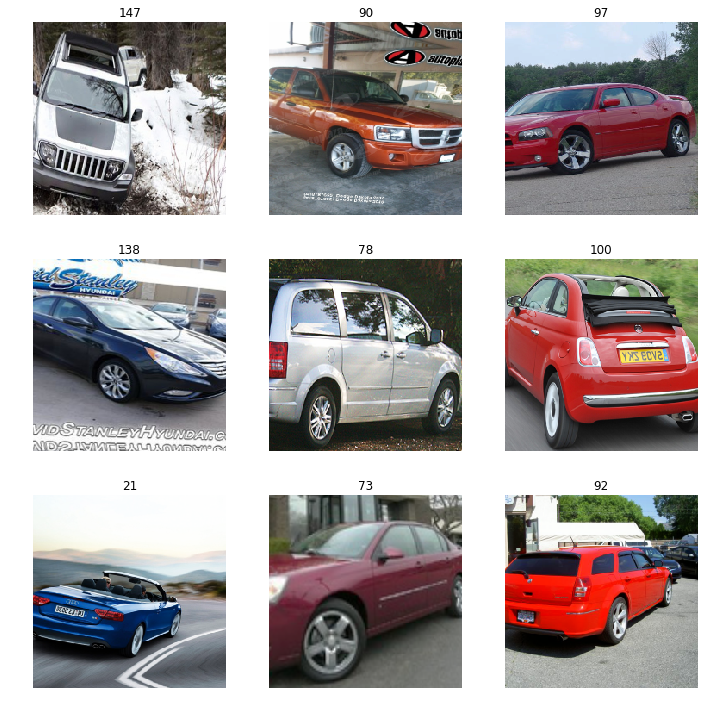

In [27]:
data.show_batch(rows=3, figsize=(10,10))

In [28]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [29]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,5.259425,4.134124,0.865479,00:53
1,3.945733,3.055593,0.705774,00:52
2,3.023760,2.600774,0.613636,00:49
3,2.513339,2.522702,0.605037,00:50
